### 1번

다음은 사내 헬스 클럽의 정규 회원 30명에 대한 건강 기록에 관한 것이다.
 x1 = 몸무게(단위: 파운드)
 x2 = 휴식시 1분당 맥박수
 x3 = 팔, 다리의 힘(strength)(들어올릴 수 있는 파운드 수)
 x4 = 1/4-mile trial run 시 걸린 시간(단위: 초)
 y = 1-mile run 시 걸린 시간(단위: 초)

<img src="https://latex.codecogs.com/svg.image?&space;y_i=\beta_0&plus;\beta_1&space;x_{1i}&plus;\beta_2&space;x_{2i}&plus;\beta_3&space;x_{3i}&plus;\beta_4&space;x_{4i}&plus;u_i,\;\;\;u_i\sim&space;N(0,\sigma^2),\;\;\;i=1,\cdots,30">
을 적합하고 여러 가지 진단 통계량에 의해서 outlier, influential points, high leverage points가 있는지 알아보아라.(이들 통계량들의 값에 대한 표와 plot을 제시할 것!)

In [25]:
x1 = c(217, 141, 152, 153, 180, 193, 162, 180, 205, 168,
       232, 146, 173, 155, 212, 138, 147, 197, 165, 125,
       161, 132, 257, 236, 149, 161, 198, 245, 141, 177)
x2 = c(67, 52, 58, 56, 66, 71, 65, 80, 77, 74,
       65, 68, 51, 64, 66, 70, 54, 76, 59, 58,
       52, 62, 64, 72, 57, 57, 59, 70, 63, 53)
x3 = c(260, 190, 203, 183, 170, 178, 160, 170, 188, 170,
       220, 158, 243, 198, 220, 180, 150, 228, 188, 160,
       190, 163, 313, 225, 173, 173, 220, 218, 193, 183)
x4 = c(91, 66, 68, 70, 77, 82, 74, 84, 83, 79,
       72, 68, 56, 59, 77, 62, 75, 88, 70, 66,
       69, 59, 96, 84, 68, 65, 62, 69, 60, 75)
y = c(481, 292, 338, 357, 396, 429, 345, 469, 425, 358,
      393, 346, 279, 311, 401, 267, 404, 442, 368, 295,
      391, 264, 487, 481, 374, 309, 367, 469, 252, 338)

주어진 데이터를
<img src="https://latex.codecogs.com/svg.image?&space;y_i=\beta_0&plus;\beta_1&space;x_{1i}&plus;\beta_2&space;x_{2i}&plus;\beta_3&space;x_{3i}&plus;\beta_4&space;x_{4i}&plus;u_i,\;\;\;u_i\sim&space;N(0,\sigma^2),\;\;\;i=1,\cdots,30"> 로 적합하는 R 코드는 다음과 같다.

In [26]:
df = data.frame(x1, x2, x3, x4, y)
result = lm(y~x1+x2+x3+x4, data=df)
summary(result)


Call:
lm(formula = y ~ x1 + x2 + x3 + x4, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-55.223 -18.821  -5.321  18.928  44.487 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -3.6186    56.1027  -0.064 0.949086    
x1            1.2676     0.2869   4.419 0.000168 ***
x2           -0.5252     0.8628  -0.609 0.548194    
x3           -0.5050     0.2459  -2.054 0.050614 .  
x4            3.9030     0.7477   5.220 2.11e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 28.67 on 25 degrees of freedom
Multiple R-squared:  0.8531,	Adjusted R-squared:  0.8296 
F-statistic:  36.3 on 4 and 25 DF,  p-value: 4.51e-10


적합된 식은 다음과 같다.

<img src="https://latex.codecogs.com/svg.image?&space;y_i=1.268\cdot&space;x_1&plus;(-0.525)\cdot&space;x_2&plus;(-0.505)\cdot&space;x_3&plus;3.903\cdot&space;x_4-3.619">

outlier 인지 여부는 Studentized Residual로 판단할 수 있는데, Studentized Residual을 구하기 위해서는 우선 Hat Value를 구해야 한다.

참고로 Hat Value가 Hat value의 평균보다 크면 Leverage가 크다고 할 수 있다.

Hat Value의 평균은  <img src="https://latex.codecogs.com/svg.image?\bar{h}=\frac{k&plus;1}{n}=\frac{4&plus;1}{30}=0.167"> 이다.

따라서 Hat Value가 0.167보다 큰 데이터는 Leverage가 크다고 할 수 있다.

In [27]:
# Hat_value의 평균 구하기(Hat_value의 평균은 (k+1)/n 임을 확인)
mean_hat = mean(hatvalues(result))

# df에 HatValue 컬럼 추가
df$HatValue = hatvalues(result)

# df에 IsLeverageHigh 컬럼 추가
leverage = ifelse(hatvalues(result) > mean_hat, "Y", "N")
df$IsLeverageHigh = leverage

# IsLeverageHigh 값의 인덱스 확인
which(df$IsLeverageHigh == "Y")

[1]  1  8 11 13 16 17 18 23 27 28 30

1, 8, 11, 13, 16, 17, 18, 23, 27, 28, 30 번째 데이터는 각각의 Hat Value가 Hat Value의 평균인 0.167보다 크기 때문에 Leverage가 큰 데이터라고 할 수 있다.

Outlier인지 여부는 Studentized Residual 로 판단할 수 있다.

자기자신을 제외한 데이터로 계산한 External Studentized Residual을 사용하며,
자기자신을 제외한 데이터로 여러 번의 계산을 하는 것을 다중 비교로 보아 본페로니 적응 방법을 사용하여 검정할 필요가 있다.

In [71]:
# Studentized Residual 구하기

# 자기자신을 포함하지 않은 External Studentized Residual은 rstudent 함수로 구한다.
df$StuRes = rstudent(result)

# 자기자신을 포함한 Internal Studentized Residual은 rstandard 함수로 구한다.
# (비교를 위해 계산해 본다)
df$StuResForCompare = rstandard(result)

In [101]:
# t_max를 구하기 위해 df$StuRes에서 가장 절대값이 큰 값을 찾고, 이 값으로 p-value를 계산한다.
t_max = max(abs(df$StuRes))
cat("가장 큰 t 절대값:", t_max, "\n")

# t분포 검정
p_single = pt(t_max, df=30-4-2, lower.tail = FALSE)
cat("단측검정 p값: ", p_single, "\n")
p_two_tailed = 2*p_single
cat("양측검정 p값: ", p_two_tailed, "\n")

# 30번의 관찰을 한 경우 본페로니 적응을 적용하면 p 값은 다음과 같다.
p_final = p_two_tailed / 30
cat("본페로니 적응 p값:", p_final)

가장 큰 t 절대값: 2.325376 
단측검정 p값:  0.01441446 
양측검정 p값:  0.02882892 
본페로니 적응 p값: 0.000960964

In [102]:
# outlier가 되는 t값은 절대값이 3.483보다 큰 경우라고 할 수 있다.
qt(0.000960964, 24, lower.tail = FALSE)

# outlier 여부를 판단해서 IsOutlier 컬럼으로 추가한다.
outlier = ifelse(abs(df$StuRes) > 3.483, "Y", "N")
df$IsOutlier = outlier

[1] 3.482899

In [105]:
# 유의수준 0.05 수준으로 Outlier가 있는지도 살펴본다.
qt(0.025, 24, lower.tail=FALSE)

# outlier 여부를 판단해서 IsOutlier 컬럼으로 추가한다.
outlier_95 = ifelse(abs(df$StuRes) > 2.064, "Y", "N")
df$IsOutlier_95 = outlier_95

[1] 2.063899

In [106]:
df

x1,x2,x3,x4,y,HatValue,IsLeverageHigh,StuRes,StuResForCompare,IsOutlier,IsOutlier_95
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>
217,67,260,91,481,0.24940559,Y,0.8347688,0.8398767,N,N
141,52,190,66,292,0.12621605,N,-0.6434769,-0.6511529,N,N
152,58,203,68,338,0.09037161,N,0.5961034,0.6039410,N,N
153,56,183,70,357,0.07867432,N,0.5477671,0.5556002,N,N
180,66,170,77,396,0.09034233,N,-0.3076680,-0.3133949,N,N
193,71,178,82,429,0.11042797,N,-0.1775854,-0.1811284,N,N
162,65,160,74,345,0.08431676,N,-1.1217615,-1.1160099,N,N
180,80,170,84,469,0.22058648,Y,1.8381930,1.7565183,N,N
205,77,188,83,425,0.14679644,N,-0.7412875,-0.7480580,N,N


External Studentized Residual이 본페로니 적응 방법을 적용하여 계산한 t_max의 p_value 값을 충족시키는 값이 없으므로, 결론적으로 Outlier는 없다.

다만, alpha = 0.05 수준에서는 30번째 데이터를 Outlier로 볼 수 있다.

Influential Points 여부는 쿡의 거리를 통해 판단할 수 있다.

<img src="https://latex.codecogs.com/svg.image?D_i>\frac{4}{n-k-1}"> 이면 Influential Points로 판단할 수 있다.

In [123]:
# 쿡의 거리를 계산하여 CookDis 컬럼에 입력한다.
df$CookDis = cooks.distance(result)

# 쿡의 거리가 4/(30-4-1) = 0.16 보다 크면 IsInfluential 에 "Y"로 입력한다.
df$IsInfluential = ifelse(df$CookDis > 0.16, "Y", "N")

# IsLeverageHigh 값의 인덱스 확인
which(df$IsInfluential == "Y")

[1]  8 23 28 30

쿡의 거리가 0.16 이상이어서 영향력이 있는 데이터는 
8, 23, 28, 30 번째 데이터 이다.

In [111]:
df

x1,x2,x3,x4,y,HatValue,IsLeverageHigh,StuRes,StuResForCompare,IsOutlier,IsOutlier_95,CookDis,IsInfluential
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
217,67,260,91,481,0.24940559,Y,0.8347688,0.8398767,N,N,0.0468772254,N
141,52,190,66,292,0.12621605,N,-0.6434769,-0.6511529,N,N,0.0122491629,N
152,58,203,68,338,0.09037161,N,0.5961034,0.6039410,N,N,0.0072474802,N
153,56,183,70,357,0.07867432,N,0.5477671,0.5556002,N,N,0.0052719901,N
180,66,170,77,396,0.09034233,N,-0.3076680,-0.3133949,N,N,0.0019508653,N
193,71,178,82,429,0.11042797,N,-0.1775854,-0.1811284,N,N,0.0008145187,N
162,65,160,74,345,0.08431676,N,-1.1217615,-1.1160099,N,N,0.0229369008,N
180,80,170,84,469,0.22058648,Y,1.8381930,1.7565183,N,N,0.1746410414,Y
205,77,188,83,425,0.14679644,N,-0.7412875,-0.7480580,N,N,0.0192558820,N


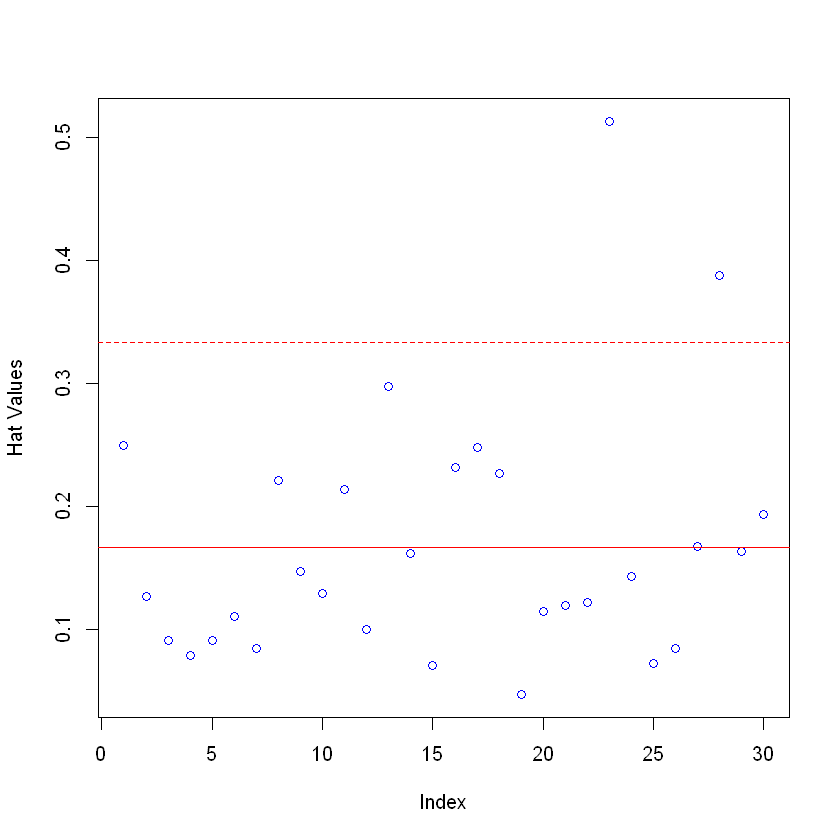

In [114]:
# Hat Value 그래프
plot(df$HatValue, xlab="Index", ylab="Hat Values", col="blue")
abline(h=mean(df$HatValue), col="red")
abline(h=2*mean(df$HatValue), col="red", lty=2)

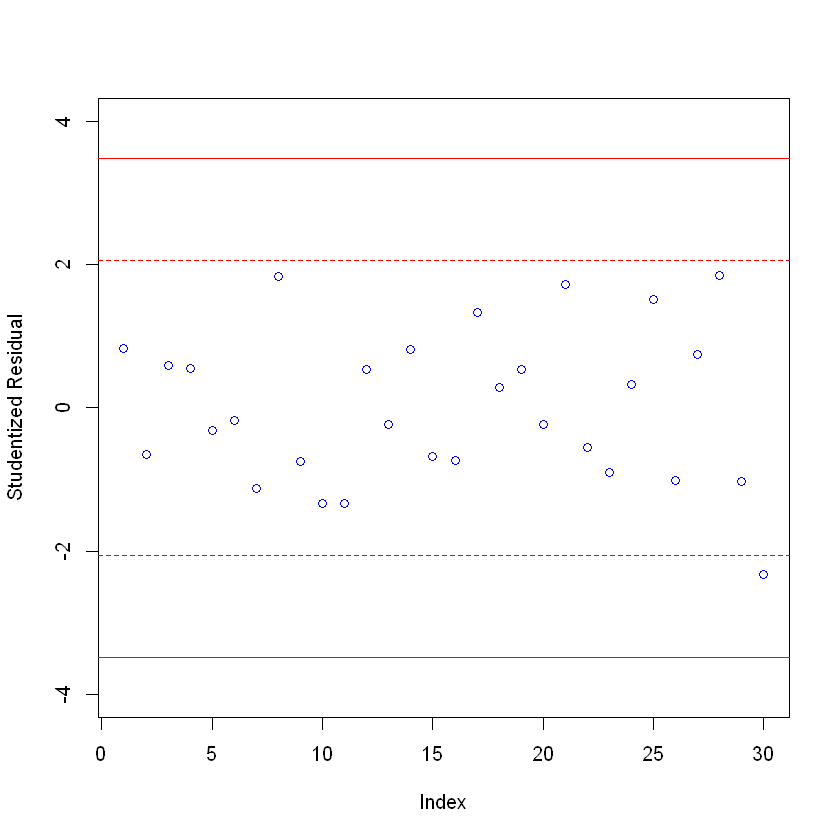

In [119]:
# 잔차 그래프
plot(df$StuRes, ylim=c(-4,4), xlab="Index", ylab="Studentized Residual", col="blue")
abline(h=3.483, col="red")
abline(h=-3.483, col="red")
abline(h=2.063, col="red", lty=2)
abline(h=-2.063, col="red", lty=2)

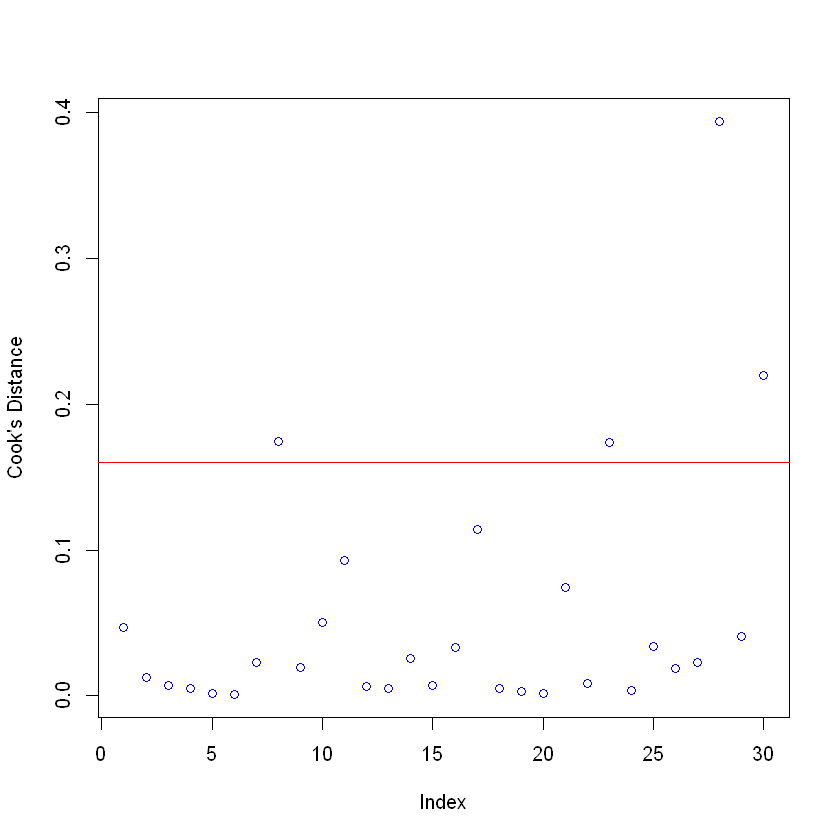

In [121]:
# 영향력 그래프
plot(df$CookDis, xlab="Index", ylab="Cook's Distance", col="blue")
abline(h=0.16, col="red")